<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoiding overfitting that is commonly referred to as _train/test split_ validation. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [3]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column
# total nulls
print('\ntotal nulls\n',X.isna().sum())

# index
print('\nx-index -->',X.index)
print('\ny-index -->',y.index)


# shape
print('\nX-Shape -->', X.shape)
print('\ny-Shape--->', y.shape)

# summary statistics
print('\nX-Summary statistics\n', X.describe())
print('\ny-Summary statistics\n', y.describe())

# the number of unique values 
print('\nthe number of unique values in X\n',X.nunique())
print('\nthe number of unique values in Y \n',y.nunique())


total nulls
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

x-index --> RangeIndex(start=0, stop=506, step=1)

y-index --> RangeIndex(start=0, stop=506, step=1)

X-Shape --> (506, 13)

y-Shape---> (506, 1)

X-Summary statistics
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000  

## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
Score and plot your predictions. What do these results tell us?

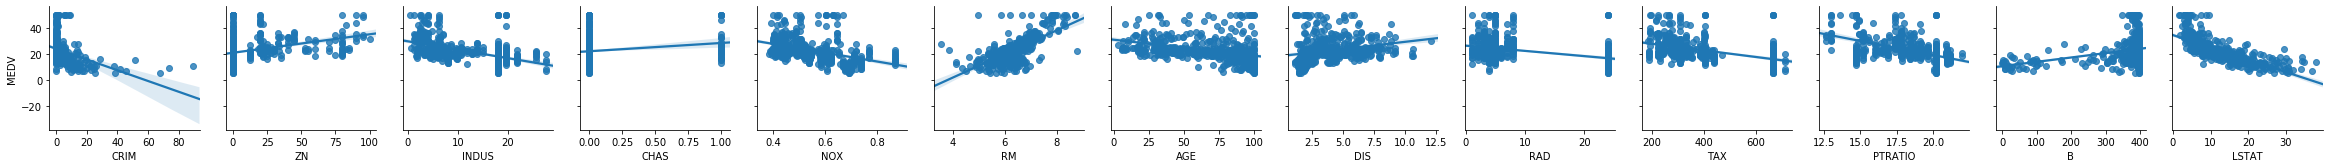

In [5]:
#Selecting which features are relevant
import seaborn as sns
completeset=X
completeset['MEDV'] = y
sns.pairplot(completeset, x_vars=boston.feature_names, y_vars='MEDV', kind='reg');

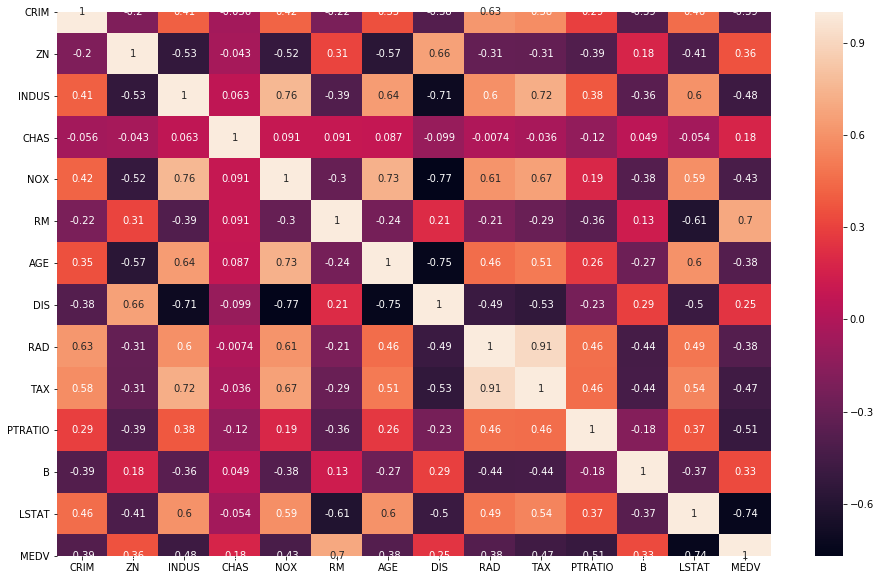

In [6]:
fig, axis = plt.subplots(figsize=(16,10))
sns.heatmap(completeset.corr(), annot=True, ax=axis)

In [7]:
from sklearn.linear_model import LinearRegression
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [8]:
#['CRIM',  'NOX', 'RM', 'PTRATIO','LSTAT']
  
# Model 1: Choosing features which are more related to target variable 
new_features = ['CRIM', 'NOX', 'RM', 'PTRATIO','LSTAT']
target_variable = ['MEDV']
lr = LinearRegression()
(Xtrain,Xtest,Ytrain,Ytest) = train_test_split(
    completeset[new_features], completeset[target_variable],random_state=29
)
lr.fit(Xtrain, Ytrain)
lr.intercept_
lr.coef_
predictions = lr.predict(Xtest)
predictions
predict =  pd.DataFrame(predictions)

print('MAE:', metrics.mean_absolute_error(Ytest, predict))
print('MSE:', metrics.mean_squared_error(Ytest, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Ytest, predict)))
print("Median absolute error", metrics.median_absolute_error(Ytest, predict))

MAE: 3.263675513069271
MSE: 18.766689023635724
RMSE: 4.3320536727556505
Median absolute error 2.538342361544398


In [9]:
# Model 2: Choosing all the features fo curiosity 
# When we include all the features for linear regression | for compariosn  

# CRIM     
# ZN         
# INDUS     
# CHAS        
# NOX         
# RM        
# AGE     
# DIS        
# RAD        
# TAX         
# PTRATIO     
# B          
# LSTAT

new_features = ['CRIM','ZN', 'INDUS', 'CHAS','AGE', 'NOX','DIS','RAD','RM', 'PTRATIO','LSTAT', 'TAX','B']
target_variable = ['MEDV']
lr_all_features = LinearRegression()
(Xtrain,Xtest,Ytrain,Ytest) = train_test_split(
    completeset[new_features], completeset[target_variable],random_state=29
)
lr_all_features.fit(Xtrain, Ytrain)
lr_all_features.intercept_
print('\n coefficients  \n ',lr_all_features.coef_)
predictions = lr_all_features.predict(Xtest)

predict =  pd.DataFrame(predictions)

print('MAE:', metrics.mean_absolute_error(Ytest, predict))
print('MSE:', metrics.mean_squared_error(Ytest, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Ytest, predict)))
print("Median absolute error", metrics.median_absolute_error(Ytest, predict))


 coefficients  
  [[-9.35811334e-02  5.31800698e-02  3.67125390e-02  3.43338847e+00
  -2.54930954e-03 -1.48087291e+01 -1.36624878e+00  3.22244933e-01
   3.54024870e+00 -9.65171087e-01 -5.51213763e-01 -1.29376404e-02
   1.10630023e-02]]
MAE: 2.9499318230427427
MSE: 16.259463001015114
RMSE: 4.032302444139714
Median absolute error 2.066980099789628


In [10]:
# 3rd & final Model : score using Lasso Regressor and complete set of features

#better for complete set in lasso 
new_features = ['CRIM','ZN', 'INDUS', 'CHAS','AGE', 'NOX','DIS','RAD','RM', 'PTRATIO','LSTAT', 'TAX','B']
#new_features = ['CRIM', 'NOX', 'RM', 'PTRATIO','LSTAT']
target_variable = ['MEDV']
lasso = sklearn.linear_model.Lasso()
(Xtrain,Xtest,Ytrain,Ytest) = train_test_split(
    completeset[new_features], completeset[target_variable],random_state=29
)
lasso.fit(Xtrain, Ytrain)
print('\n intercepts \n ',lasso.intercept_)
print('\n coefficients  \n ',lasso.coef_)
predictions = lasso.predict(Xtest)

predict =  pd.DataFrame(predictions)

print('MAE:', metrics.mean_absolute_error(Ytest, predict))
print('MSE:', metrics.mean_squared_error(Ytest, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Ytest, predict)))
print("Median absolute error", metrics.median_absolute_error(Ytest, predict))



 intercepts 
  [45.09705416]

 coefficients  
  [-0.06519088  0.05677987 -0.          0.          0.02182623 -0.
 -0.69008198  0.31325995  0.51004962 -0.79614765 -0.78755944 -0.0164184
  0.0093792 ]
MAE: 3.454464279628491
MSE: 22.29047980922699
RMSE: 4.721279467393027
Median absolute error 2.5785700225868844


### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?


 intercepts 
  [43.52005123]

 coefficients  
  [-0.06080501  0.04908334 -0.          0.          0.0142128  -0.
 -0.63858292  0.29134491  0.63779442 -0.76417138 -0.74476363 -0.01595631
  0.00936198]
MAE: 3.474658010210359
MSE: 24.136283356698527
RMSE: 4.912869157294801
Median absolute error 2.415091171778105


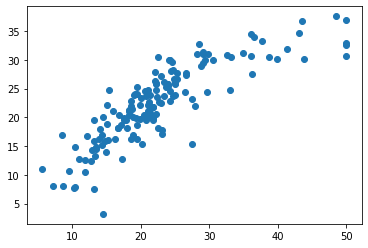

In [11]:
# 70/30 split

new_features = ['CRIM','ZN', 'INDUS', 'CHAS','AGE', 'NOX','DIS','RAD','RM', 'PTRATIO','LSTAT', 'TAX','B']
#new_features = ['CRIM', 'NOX', 'RM', 'PTRATIO','LSTAT']
target_variable = ['MEDV']
lasso = sklearn.linear_model.Lasso()
(Xtrain,Xtest,Ytrain,Ytest) = train_test_split(
    completeset[new_features], completeset[target_variable],test_size=0.30,random_state=29
)
lasso.fit(Xtrain, Ytrain)
print('\n intercepts \n ',lasso.intercept_)
print('\n coefficients  \n ',lasso.coef_)
predictions = lasso.predict(Xtest)
predict =  pd.DataFrame(predictions)


plt.scatter(Ytest, predict)


print('MAE:', metrics.mean_absolute_error(Ytest, predict))
print('MSE:', metrics.mean_squared_error(Ytest, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Ytest, predict)))
print("Median absolute error", metrics.median_absolute_error(Ytest, predict))


 intercepts 
  [43.87661896]

 coefficients  
  [-0.05192715  0.05060434 -0.          0.          0.01470655 -0.
 -0.69129931  0.26342064  0.59766381 -0.71348962 -0.78160752 -0.0149688
  0.007715  ]
MAE: 3.7847345616275754
MSE: 29.114540944942483
RMSE: 5.39578918648074
Median absolute error 2.5687239018331454


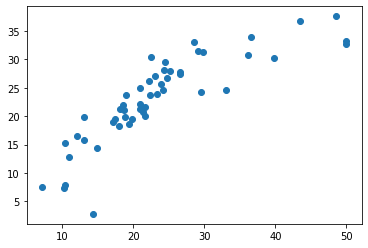

In [12]:
# 90/10 split

new_features = ['CRIM','ZN', 'INDUS', 'CHAS','AGE', 'NOX','DIS','RAD','RM', 'PTRATIO','LSTAT', 'TAX','B']
#new_features = ['CRIM', 'NOX', 'RM', 'PTRATIO','LSTAT']
target_variable = ['MEDV']
lasso = sklearn.linear_model.Lasso()
(Xtrain,Xtest,Ytrain,Ytest) = train_test_split(
    completeset[new_features], completeset[target_variable],test_size=0.10,random_state=29
)
lasso.fit(Xtrain, Ytrain)
print('\n intercepts \n ',lasso.intercept_)
print('\n coefficients  \n ',lasso.coef_)
predictions = lasso.predict(Xtest)
predict =  pd.DataFrame(predictions)


plt.scatter(Ytest, predict)

print('MAE:', metrics.mean_absolute_error(Ytest, predict))
print('MSE:', metrics.mean_squared_error(Ytest, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Ytest, predict)))
print("Median absolute error", metrics.median_absolute_error(Ytest, predict))


 intercepts 
  [44.2832303]

 coefficients  
  [-0.06462283  0.0417177  -0.          0.          0.01407525 -0.
 -0.5817038   0.30499641  0.55910407 -0.77968572 -0.75708715 -0.01621095
  0.00968307]
MAE: 3.4534207802122454
MSE: 22.533610851997288
RMSE: 4.746958063012279
Median absolute error 2.578195969263348


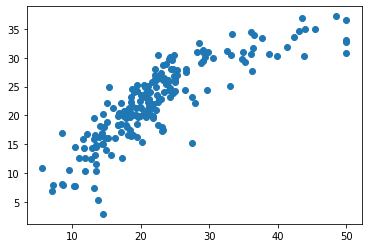

In [14]:
# 60/40 split : for curiosity

new_features = ['CRIM','ZN', 'INDUS', 'CHAS','AGE', 'NOX','DIS','RAD','RM', 'PTRATIO','LSTAT', 'TAX','B']
#new_features = ['CRIM', 'NOX', 'RM', 'PTRATIO','LSTAT']
target_variable = ['MEDV']
lasso = sklearn.linear_model.Lasso()
(Xtrain,Xtest,Ytrain,Ytest) = train_test_split(
    completeset[new_features], completeset[target_variable],test_size=0.40,random_state=29
)
lasso.fit(Xtrain, Ytrain)
print('\n intercepts \n ',lasso.intercept_)
print('\n coefficients  \n ',lasso.coef_)
predictions = lasso.predict(Xtest)
predict =  pd.DataFrame(predictions)

plt.scatter(Ytest, predict)

print('MAE:', metrics.mean_absolute_error(Ytest, predict))
print('MSE:', metrics.mean_squared_error(Ytest, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Ytest, predict)))
print("Median absolute error", metrics.median_absolute_error(Ytest, predict))

In [15]:
#what does this tell us 

# following in the order of better prediction
# 80/20 > 60/40 > 70/30 > 90/10

# conclusion : there is no thumb rule of splitting of data in 80/20 fixed set. Also, the splitting ratio doesnot gurantee good result. 
# in this case even if we have more training data in 90/10 split, it is not performing that well. On the other side 90/10 data split can cause to overfitting


### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [17]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(lasso, completeset[new_features], completeset[target_variable], cv=5)
# scores

array([0.56155388, 0.63382742, 0.33460967, 0.35475643, 0.27447511])

In [19]:
from sklearn import model_selection, metrics
from sklearn import linear_model


for n_splits in range(5,11):
   kf = model_selection.KFold(n_splits=n_splits, shuffle=True)

   mse_values = []
   scores = []
   n = 0

   for train_index, test_index in kf.split(X, y):
      lr = linear_model.LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
      mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
      scores.append(lr.score(X, y))
      n += 1
  

   print(f'Split : {n_splits}')
   print(f'Mean of MSE for all folds: {np.mean(mse_values)}')
   print(f'Mean of R2 for all folds: {np.mean(scores)}')

Split : 5
Mean of MSE for all folds: 2.340704310552204e-27
Mean of R2 for all folds: 1.0
Split : 6
Mean of MSE for all folds: 1.706970887728774e-27
Mean of R2 for all folds: 1.0
Split : 7
Mean of MSE for all folds: 1.1793122758432396e-27
Mean of R2 for all folds: 1.0
Split : 8
Mean of MSE for all folds: 2.1539378435247225e-27
Mean of R2 for all folds: 1.0
Split : 9
Mean of MSE for all folds: 6.9912333657080095e-28
Mean of R2 for all folds: 1.0
Split : 10
Mean of MSE for all folds: 1.680618599547085e-27
Mean of R2 for all folds: 1.0


# KNN Practice

In [20]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [21]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [22]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

     sepal_length  sepal_width  petal_length  petal_width         species  \
0             5.1          3.5           1.4          0.2     Iris-setosa   
1             4.9          3.0           1.4          0.2     Iris-setosa   
2             4.7          3.2           1.3          0.2     Iris-setosa   
3             4.6          3.1           1.5          0.2     Iris-setosa   
4             5.0          3.6           1.4          0.2     Iris-setosa   
..            ...          ...           ...          ...             ...   
145           6.7          3.0           5.2          2.3  Iris-virginica   
146           6.3          2.5           5.0          1.9  Iris-virginica   
147           6.5          3.0           5.2          2.0  Iris-virginica   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

     species_num  
0              0  
1              0  
2              0  

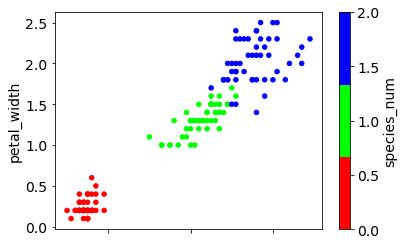

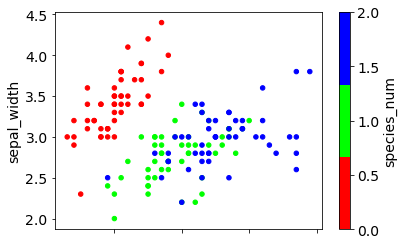

In [23]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'


iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
  
# Print the DataFrame after  
# addition of new column 
print(iris)

# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold)
plt.savefig("scatter_with_petal_length_and_width_and_species_num.pdf")

# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap=cmap_bold)
plt.savefig("scatter_with_sepal_length_and_width_and_species_num.pdf")


## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

In [24]:
# print(iris.head(1))
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


### Create your target vector "y"
This will be the species type.

In [25]:
y = iris.species_num
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species_num, Length: 150, dtype: int64


### Make Use of Train-Test-Split
Split your data in to train and test sets.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

my_X_train, my_X_test, my_y_train, my_y_test = train_test_split(X, y)
print (my_X_train.shape, my_y_train.shape)
print (my_X_test.shape, my_y_test.shape)

(112, 4) (112,)
(38, 4) (38,)


### Import KNN From `scikit-learn` and Instatiate a Model With One Neighbor

In [27]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(my_X_train, my_y_train)
print(knn1.fit(my_X_train, my_y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

In [28]:
y_preditions_knn1 = knn1.predict(my_X_test)
knn1_accuracy = metrics.accuracy_score(my_y_test, y_preditions_knn1) * 100
print(knn1_accuracy)

97.36842105263158


### Create a Model With Five Neighbors. Did it Improve?

In [29]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(my_X_train, my_y_train)
y_preditions_knn5 = knn5.predict(my_X_test)
knn5_accuracy = metrics.accuracy_score(my_y_test, y_preditions_knn5) * 100
print(knn5_accuracy)
print(knn1_accuracy > knn5_accuracy)

97.36842105263158
False


### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [30]:
# import pandas as pd

k_range = list(range(1, 101))
accuracy_data = {
    'k': [],
    'accuracy': []
}

for k in k_range:
    knnk = KNeighborsClassifier(n_neighbors=k)
    knnk.fit(my_X_train, my_y_train)
    predictions_with_knnk = knnk.predict(my_X_test)
    cur_accuracy = metrics.accuracy_score(my_y_test, predictions_with_knnk) * 100
    accuracy_data['k'].append(k)
    accuracy_data['accuracy'].append(cur_accuracy)
    # print(f'calculated for {k}')
    

accuracy_df = pd.DataFrame(accuracy_data)

print(accuracy_df.describe())
print(accuracy_df)

                k    accuracy
count  100.000000  100.000000
mean    50.500000   83.868421
std     29.011492   12.066108
min      1.000000   60.526316
25%     25.750000   65.789474
50%     50.500000   86.842105
75%     75.250000   92.105263
max    100.000000   97.368421
      k   accuracy
0     1  97.368421
1     2  97.368421
2     3  97.368421
3     4  97.368421
4     5  97.368421
..  ...        ...
95   96  65.789474
96   97  60.526316
97   98  60.526316
98   99  60.526316
99  100  60.526316

[100 rows x 2 columns]


### Bonus: According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?

## Enrichment
_Everything beyond this point is enrichment and examples using Statsmodels for linear regression._

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [ ]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

In [ ]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


## Demo: Patsy

In [ ]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [ ]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))